# Proyecto: Análisis Exploratorio y uso de ML sobre el precio de las casas.

## Realizado por: M.I.A. Wilfrido Cortes Orozco

### Sección de importación.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Carga del dataset en un dataframe.
df = pd.read_csv("casas_dataset.csv")

Se muestran las primeras y últimas filas del dataset.

In [3]:
display(df.head())
display(df.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Se muestran los tipos para cada columna.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Se muestran ahora solo los tipo objeto.
print(df.select_dtypes("object").info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

Ahora se van a mostrar los nulos, de forma numérica y de manera visual.

<AxesSubplot:>

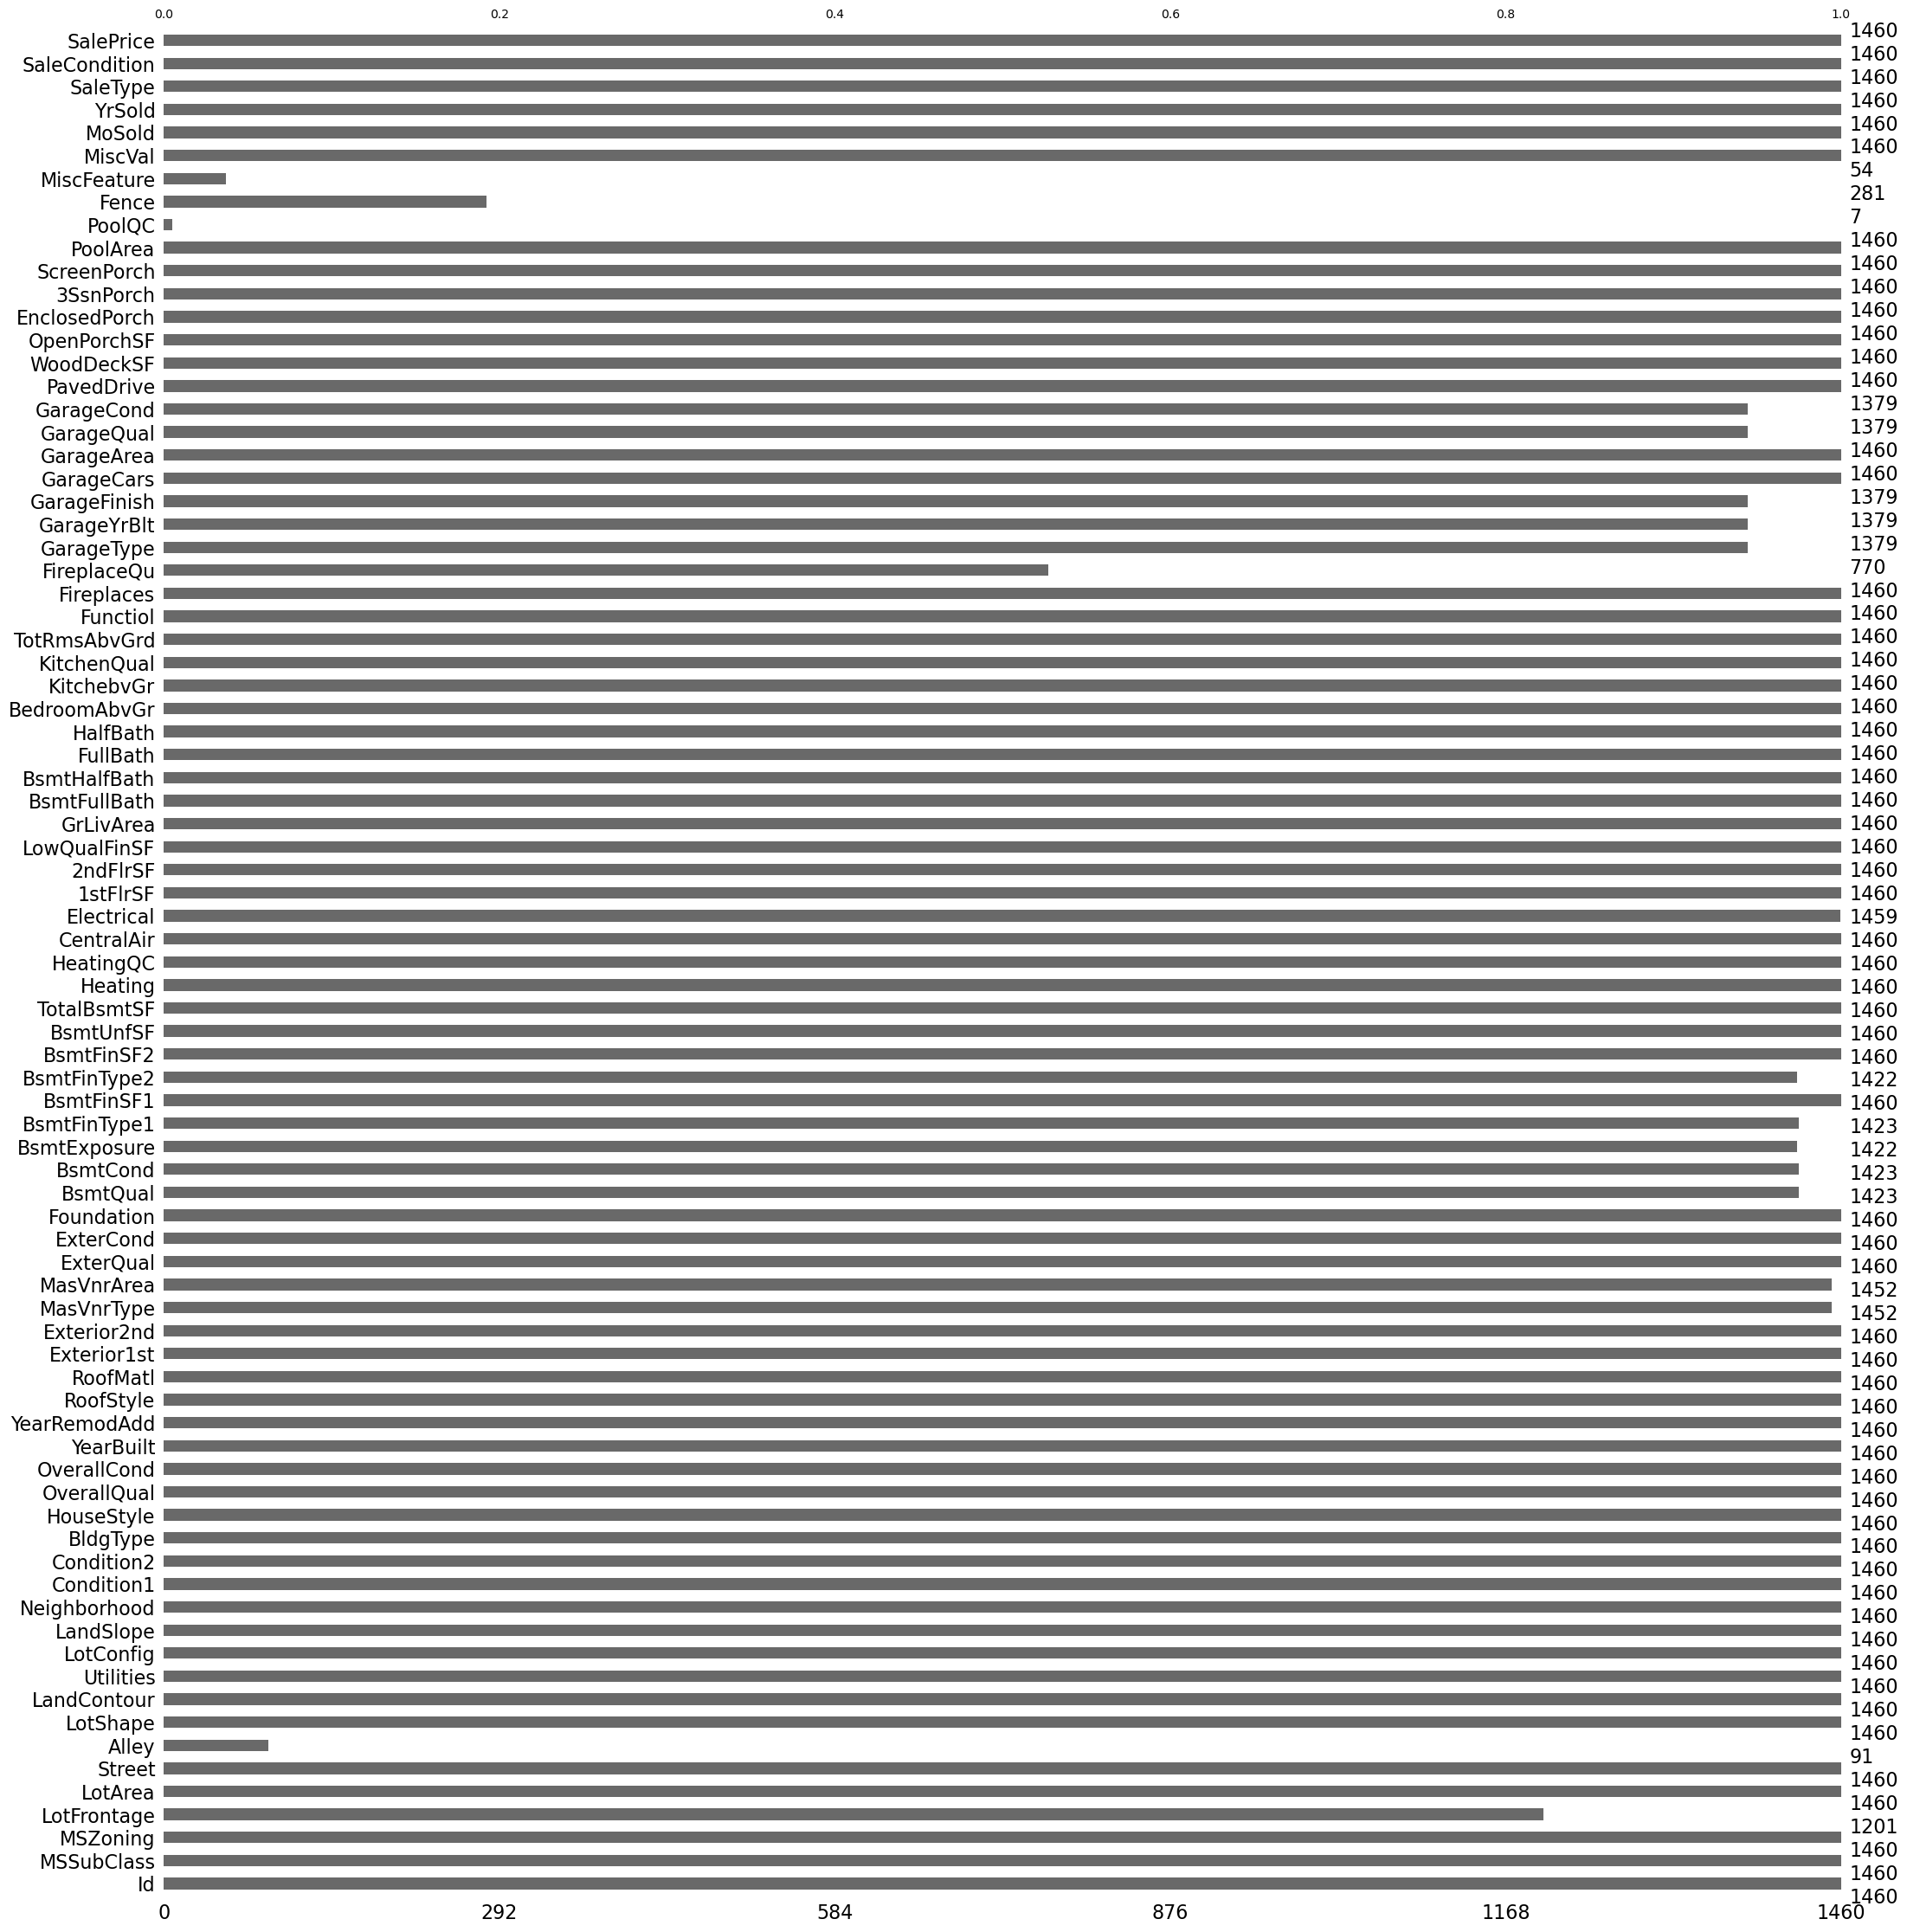

In [6]:
msno.bar(df)

<AxesSubplot:>

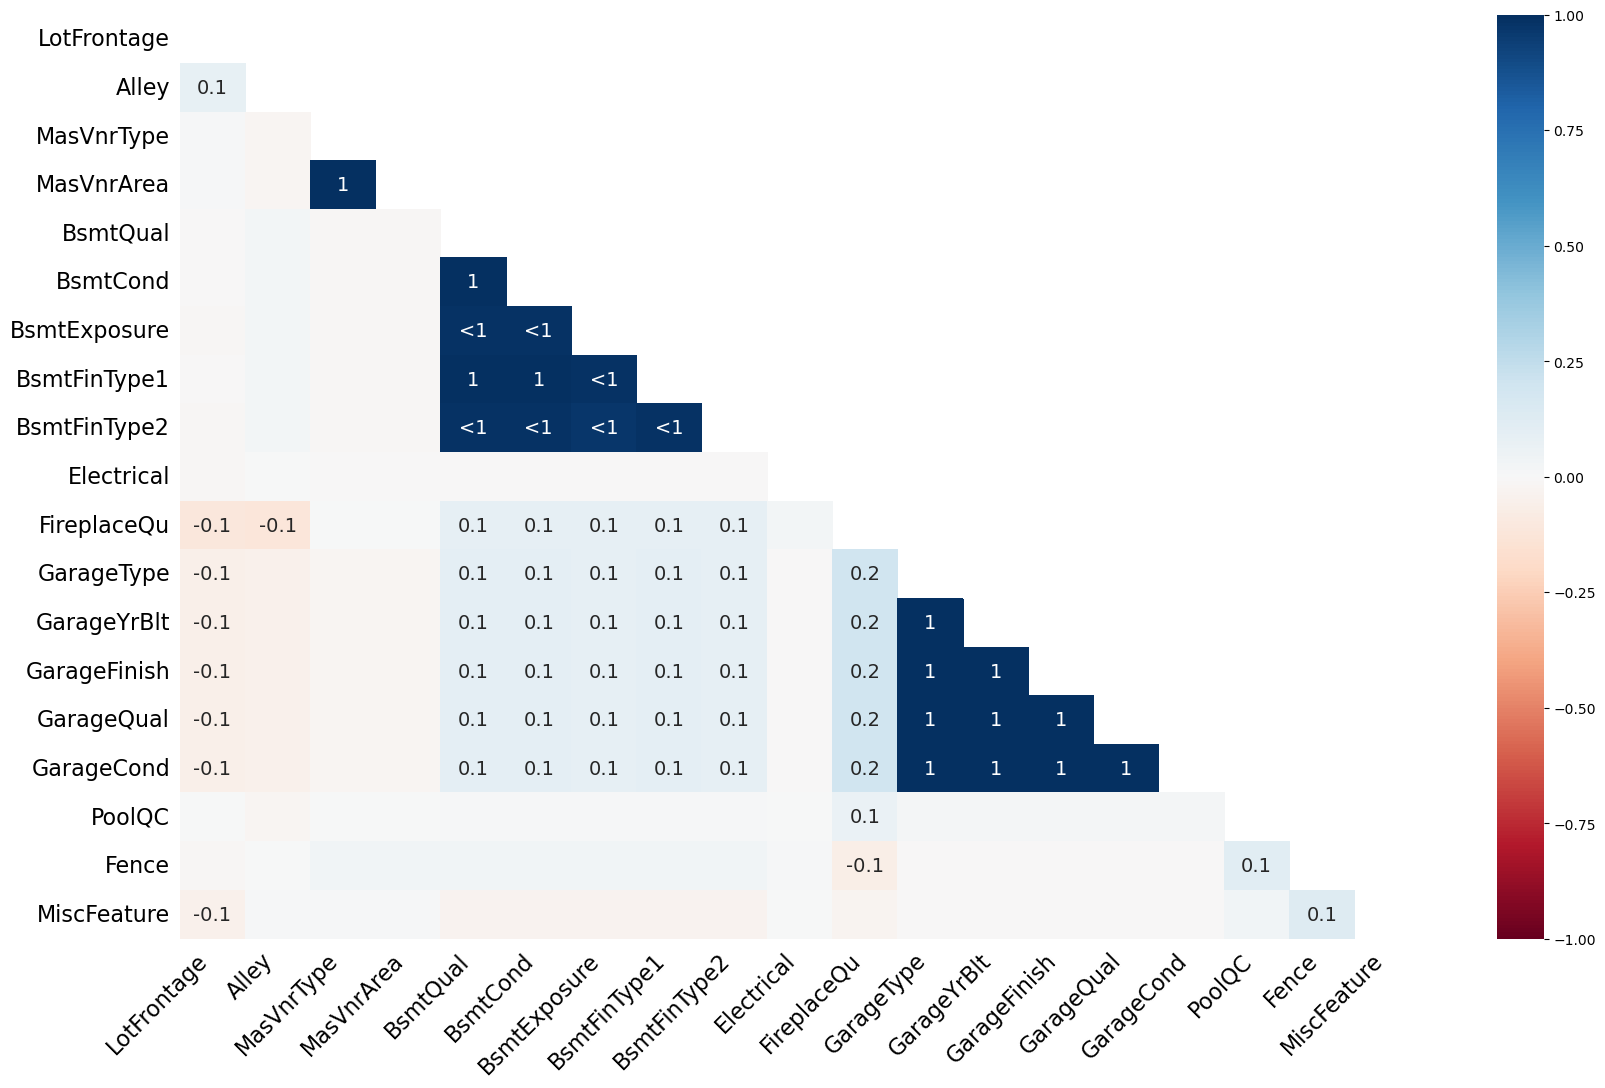

In [7]:
msno.heatmap(df)

In [8]:
nulos = df.isna().sum()
print(nulos[nulos > 0].sort_values(ascending=False))
print(f"Cantidad de datos en el dataset: {len(df)}")

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Cantidad de datos en el dataset: 1460


Como se puede ver, hay columnas que contienen demasiados nulos como:
- PoolQC, con 1453 de 1460
- MiscFeature, con 1406 de 1460
- Alley, con 1369 de 1460
- Fence, con 1179 de 1460

Eliminar estas columnas podría ayudar más que imputar.

In [9]:
df_limpio = df.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"]).copy()
nulos = df_limpio.isna().sum()
print(nulos[nulos > 0].sort_values(ascending=False))

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64


Ahora se establecerá un límite del 5% para eliminar filas con nulos.


In [10]:
limite = len(df_limpio) * 0.05
print(limite)

73.0


In [11]:
print(f"Columnas que exceden el límite: {[(element[0], element[1]) for element in nulos.items() if element[1] > limite]}")

Columnas que exceden el límite: [('LotFrontage', 259), ('FireplaceQu', 690), ('GarageType', 81), ('GarageYrBlt', 81), ('GarageFinish', 81), ('GarageQual', 81), ('GarageCond', 81)]


In [12]:
print(f"Columnas que no exceden el límite: {[(element[0], element[1]) for element in nulos.items() if element[1] <= limite and element[1] > 0]}")

Columnas que no exceden el límite: [('MasVnrType', 8), ('MasVnrArea', 8), ('BsmtQual', 37), ('BsmtCond', 37), ('BsmtExposure', 38), ('BsmtFinType1', 37), ('BsmtFinType2', 38), ('Electrical', 1)]


In [13]:
columnasNoExcedentes = [element[0] for element in nulos.items() if element[1] <= limite and element[1] > 0]
print(columnasNoExcedentes)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']


In [14]:
df_limpio.dropna(subset=columnasNoExcedentes, inplace=True)
nulos = df_limpio.isna().sum()
print(nulos[nulos > 0].sort_values(ascending=False))

FireplaceQu     657
LotFrontage     251
GarageType       74
GarageYrBlt      74
GarageFinish     74
GarageQual       74
GarageCond       74
dtype: int64


Para las demás se va a realizar la imputación, pero antes hay que revisar FireplaceQu ya que su cantidad de nulos es, por lo menos, curioso.

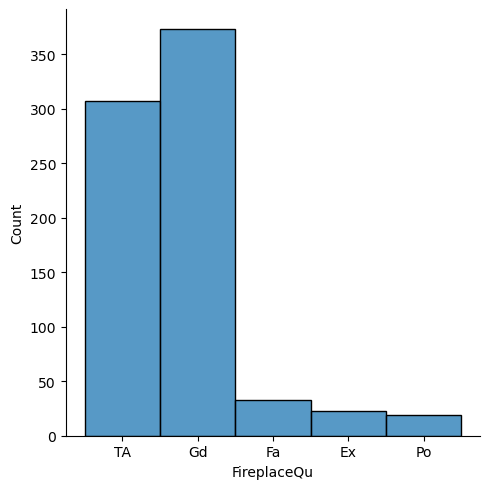

In [15]:
sns.displot(data=df_limpio, x="FireplaceQu")

In [16]:
# Debido al tipo de gráfica y a lo que significa la columna (calidad de la chimenea), voy a categorizar y crear 
# una nueva categoría para los nulos.
df_limpio["FireplaceQu"] = df_limpio["FireplaceQu"].astype("category")
df_limpio["FireplaceQu"] = df_limpio["FireplaceQu"].cat.add_categories("NA")
df_limpio["FireplaceQu"].fillna("NA", inplace=True)

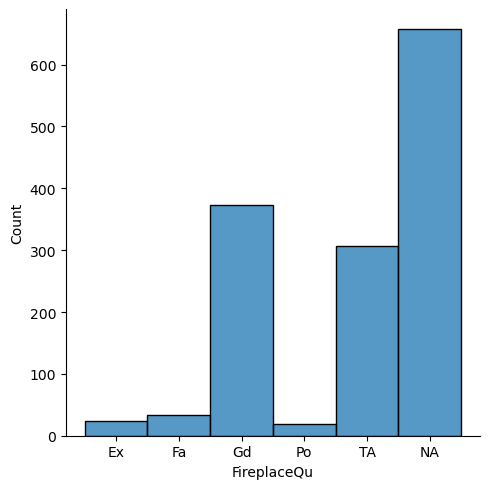

In [17]:
sns.displot(data=df_limpio, x="FireplaceQu")

In [18]:
nulos = df_limpio.isna().sum()
print(nulos[nulos > 0].sort_values(ascending=False))
columnasConNulos = nulos[nulos > 0]
# Para las demás simplemente voy a imputar la moda.

LotFrontage     251
GarageType       74
GarageYrBlt      74
GarageFinish     74
GarageQual       74
GarageCond       74
dtype: int64


In [19]:
for columna in columnasConNulos.items():
    df_limpio[columna[0]].fillna(df_limpio[columna[0]].mode()[0], inplace=True)

In [20]:
nulos = df_limpio.isna().sum()
print(nulos[nulos > 0].sort_values(ascending=False))

Series([], dtype: int64)


Ahora a mostrar los datos estadísticos del dataset.

In [21]:
display(df_limpio.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,...,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,729.773371,56.851983,68.337110,10536.987252,6.138810,5.595609,1971.428470,1985.191218,105.366856,453.694759,...,96.289660,47.247167,22.019122,3.398017,15.572946,2.852691,41.284703,6.323654,2007.809490,182507.021955
std,422.443710,42.309163,22.618074,10113.840927,1.357655,1.110511,30.371732,20.462484,182.340601,455.373263,...,126.259423,66.512564,61.192453,29.432240,56.627468,40.851699,494.856654,2.707981,1.327289,79270.416057
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,20.000000,60.000000,7572.750000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131475.000000
50%,727.500000,50.000000,63.000000,9500.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,399.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164600.000000
75%,1098.250000,70.000000,79.000000,11618.250000,7.000000,6.000000,2000.250000,2004.000000,168.000000,719.250000,...,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
# Vamos a ver qué tal está el coeficiente de variación de los datos.
CV = df_limpio.std(numeric_only=True) / df_limpio.mean(numeric_only=True)
print(CV.sort_values(ascending=False))

PoolArea         14.320407
MiscVal          11.986441
3SsnPorch         8.661593
LowQualFinSF      8.228146
BsmtHalfBath      4.076978
ScreenPorch       3.636272
BsmtFinSF2        3.419163
EnclosedPorch     2.779060
MasVnrArea        1.730531
OpenPorchSF       1.407758
WoodDeckSF        1.311246
HalfBath          1.292428
2ndFlrSF          1.247329
BsmtFullBath      1.198134
Fireplaces        1.037835
BsmtFinSF1        1.003700
LotArea           0.959842
BsmtUnfSF         0.753050
MSSubClass        0.744199
Id                0.578870
GarageArea        0.449139
SalePrice         0.434342
MoSold            0.428230
GarageCars        0.420195
TotalBsmtSF       0.373901
FullBath          0.352955
GrLivArea         0.346655
1stFlrSF          0.331329
LotFrontage       0.330978
BedroomAbvGr      0.282237
TotRmsAbvGrd      0.248117
OverallQual       0.221159
OverallCond       0.198461
KitchebvGr        0.190823
YearBuilt         0.015406
GarageYrBlt       0.012537
YearRemodAdd      0.010308
Y

In [23]:
# Se pueden observar datos muy dispersos en algunas columnas, a continuación se muestran.
columnasCVAlto = CV[CV > 2]
print(columnasCVAlto.sort_values(ascending=False))

PoolArea         14.320407
MiscVal          11.986441
3SsnPorch         8.661593
LowQualFinSF      8.228146
BsmtHalfBath      4.076978
ScreenPorch       3.636272
BsmtFinSF2        3.419163
EnclosedPorch     2.779060
dtype: float64


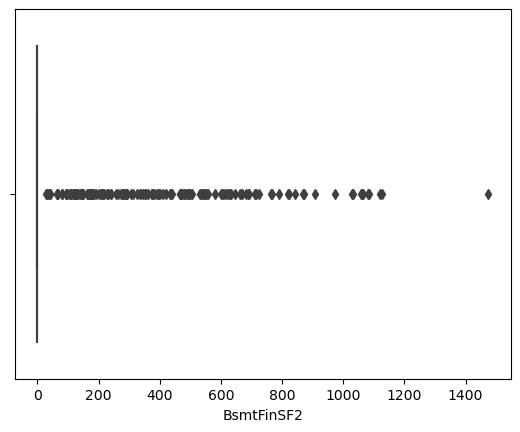

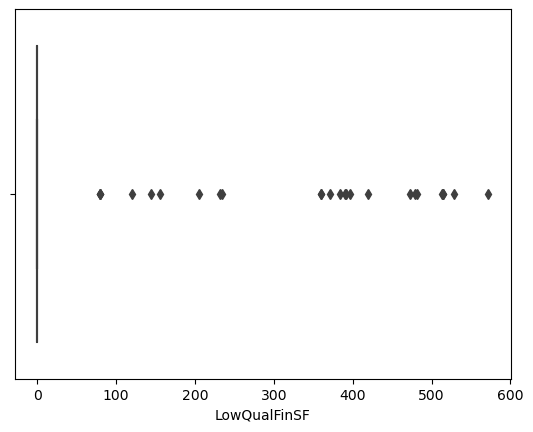

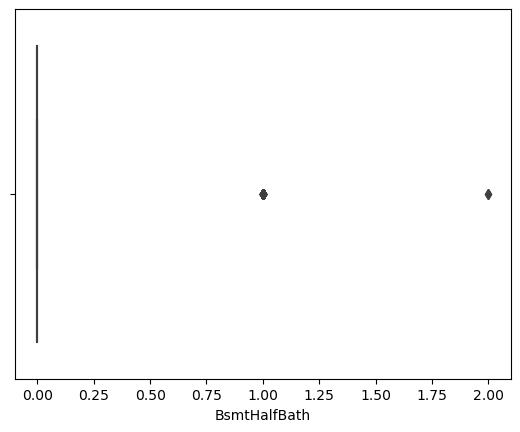

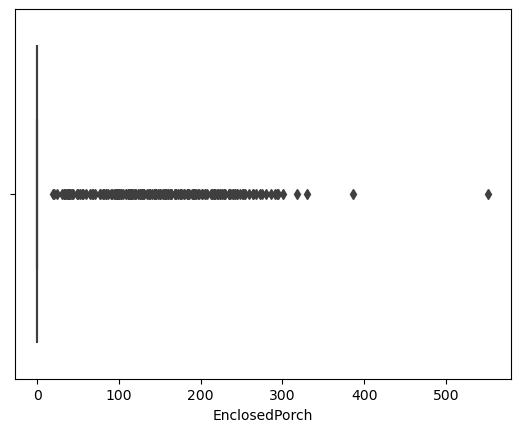

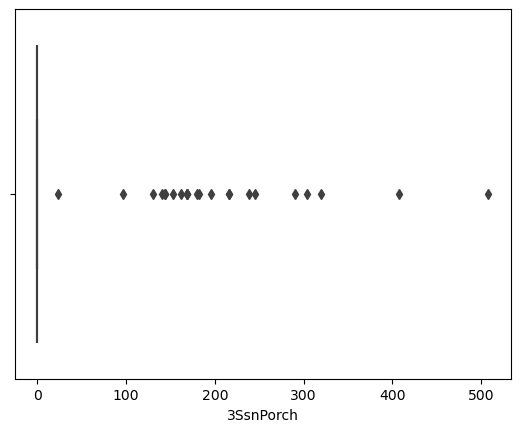

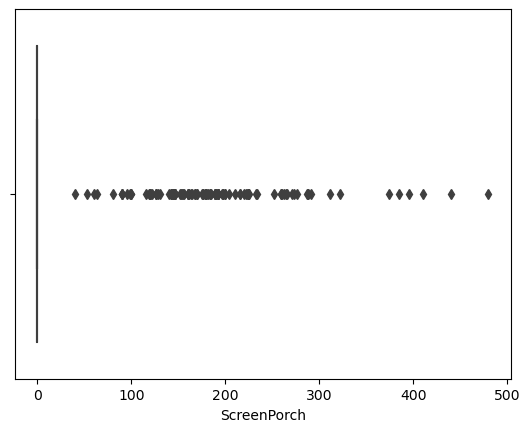

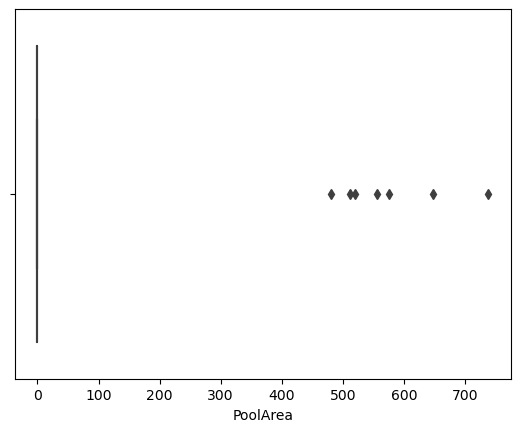

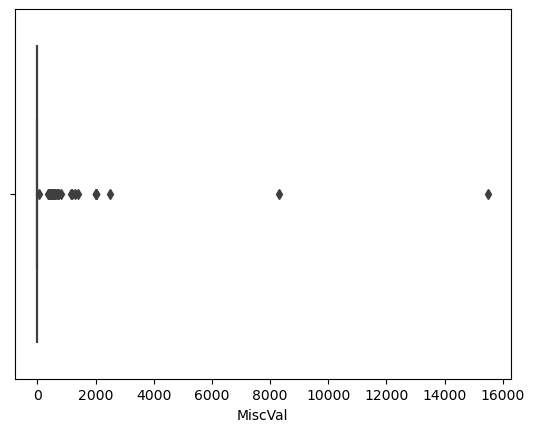

In [24]:
for columna in columnasCVAlto.items():
    sns.boxplot(data=df_limpio, x=columna[0])
    plt.show()

Como se puede observar, los datos están muy dispersos, es muy probable que sea por las variaciones que hay entre los posibles valores de las columnas, vamos a repasar las columnas afectadas:
- PoolArea: Medida de las piscinas en pies cuadrados.
- MiscVal: Valor en dólares de características varias.
- 3SsnPorch: Área del porche/patio techado.
- LowQualFinSF: Acabados de baja calidad en pies cuadrados.
- BsmtHalfBath: Si tiene medios baños en el sotano.
- ScreenPorch: Área de la ventana del porche en pies cuadrados.
- BsmtFinSF2: Acabado tipo 2 en pies cuadrados.
- EnclosedPorch: Área del porche cerrada en pies cuadrados.

In [25]:
# Siguiendo las características, el "BsmtHalfBath" es categórico realmente y solo puede tener 3 posibles valores.
print(df_limpio["BsmtHalfBath"].nunique(), df_limpio["BsmtHalfBath"].unique())

3 [0 1 2]


Habrá que analizar las correlaciones antes de preocuparnos por eso.

In [26]:
def aplicar_iqr_a_columnas(df):
    for columna in df.select_dtypes(include=["number"]).columns:
        #print(columna)
        if columna not in ["Id", "YearRemodAdd", "FullBath", "HalfBath", "GarageYrBlt", "YrSold"]:
            print(columna)
            q3 = df[columna].quantile(0.75)
            print(q3)
            q1 = df[columna].quantile(0.25)
            print(q1)
            iqr = q3 - q1
            lsuperior = q3 + (1.5 * iqr)
            linferior = q1 - (1.5 * iqr)
            df = df[(df[columna] > linferior) & (df[columna] < lsuperior)]
            print(len(df))
    return df

Ahora sigue revisar qué columnas se podrían categorizar.

In [27]:
for columna in df_limpio.select_dtypes("object").columns:
    print(f"La cantidad de posibles valores para {columna} son: {df_limpio[columna].nunique()}")

La cantidad de posibles valores para MSZoning son: 5
La cantidad de posibles valores para Street son: 2
La cantidad de posibles valores para LotShape son: 4
La cantidad de posibles valores para LandContour son: 4
La cantidad de posibles valores para Utilities son: 2
La cantidad de posibles valores para LotConfig son: 5
La cantidad de posibles valores para LandSlope son: 3
La cantidad de posibles valores para Neighborhood son: 25
La cantidad de posibles valores para Condition1 son: 9
La cantidad de posibles valores para Condition2 son: 8
La cantidad de posibles valores para BldgType son: 5
La cantidad de posibles valores para HouseStyle son: 8
La cantidad de posibles valores para RoofStyle son: 6
La cantidad de posibles valores para RoofMatl son: 8
La cantidad de posibles valores para Exterior1st son: 14
La cantidad de posibles valores para Exterior2nd son: 16
La cantidad de posibles valores para MasVnrType son: 4
La cantidad de posibles valores para ExterQual son: 4
La cantidad de posi

In [28]:
# Todas las columnas se pueden categorizar.
for columna in df_limpio.select_dtypes("object").columns:
    df_limpio[columna] = df_limpio[columna].astype("category")

In [29]:
print(df_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1412 non-null   int64   
 1   MSSubClass     1412 non-null   int64   
 2   MSZoning       1412 non-null   category
 3   LotFrontage    1412 non-null   float64 
 4   LotArea        1412 non-null   int64   
 5   Street         1412 non-null   category
 6   LotShape       1412 non-null   category
 7   LandContour    1412 non-null   category
 8   Utilities      1412 non-null   category
 9   LotConfig      1412 non-null   category
 10  LandSlope      1412 non-null   category
 11  Neighborhood   1412 non-null   category
 12  Condition1     1412 non-null   category
 13  Condition2     1412 non-null   category
 14  BldgType       1412 non-null   category
 15  HouseStyle     1412 non-null   category
 16  OverallQual    1412 non-null   int64   
 17  OverallCond    1412 non-null   in

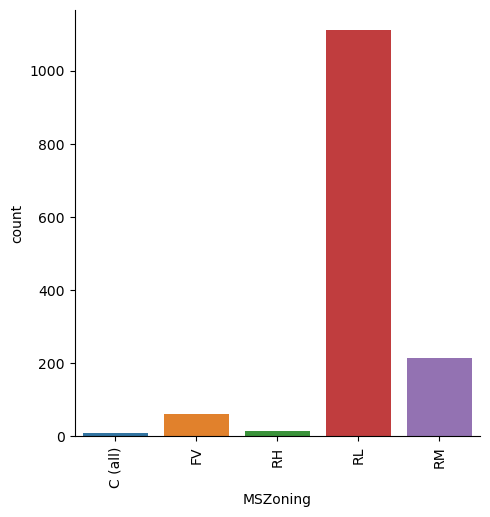

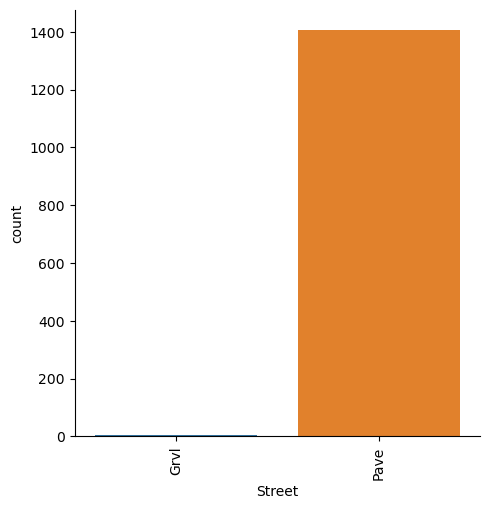

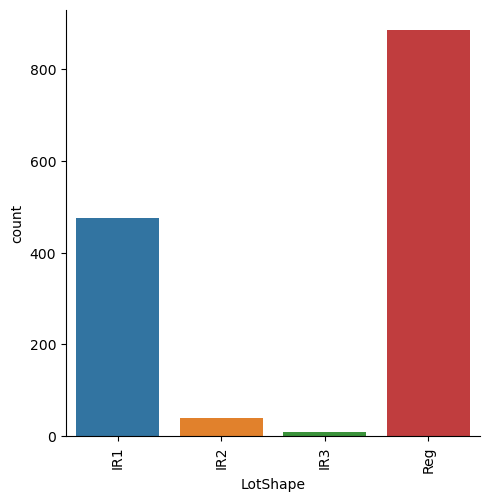

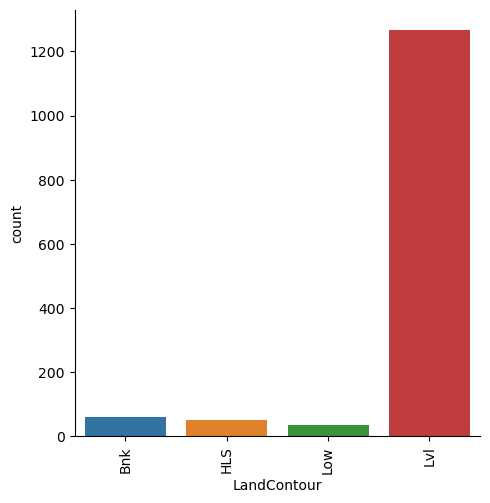

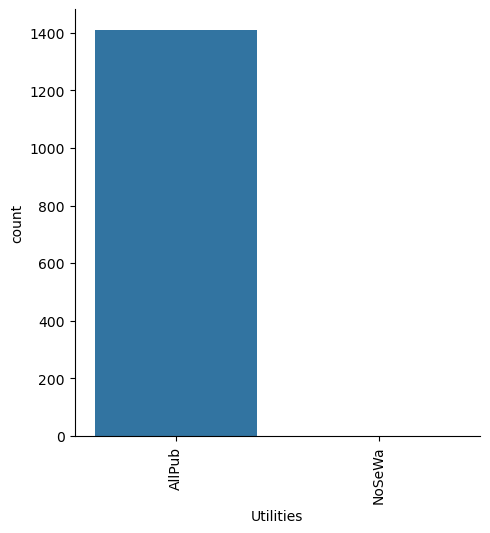

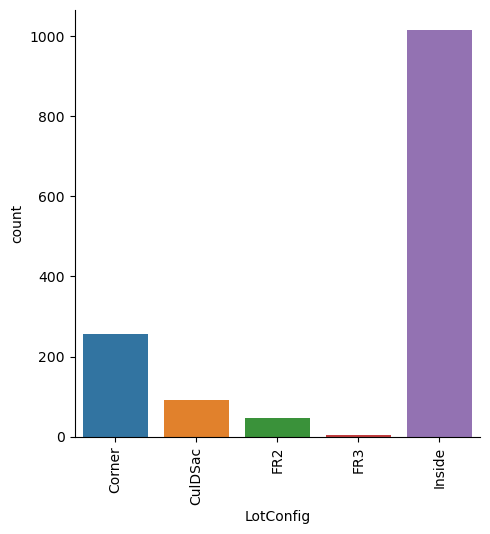

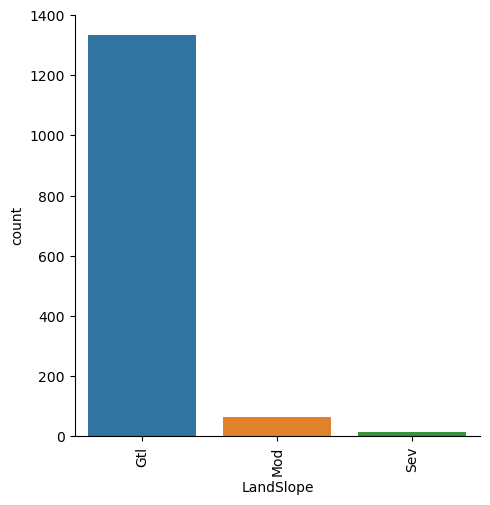

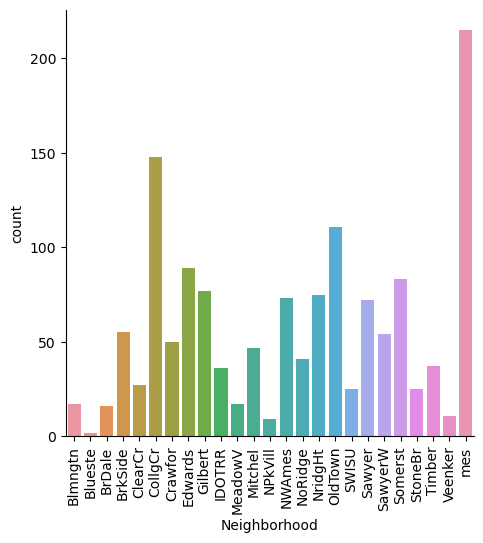

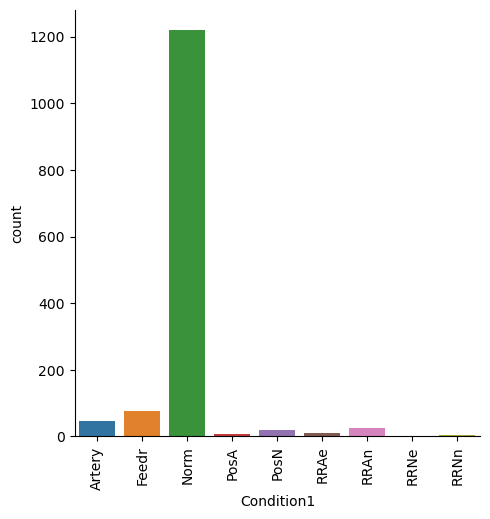

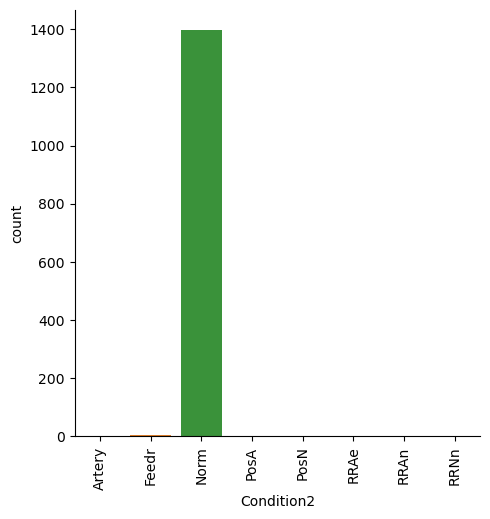

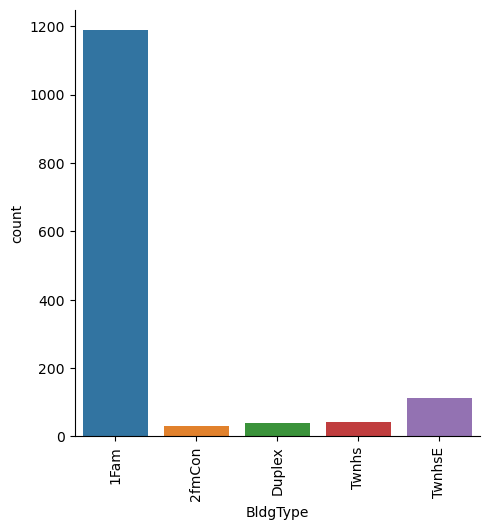

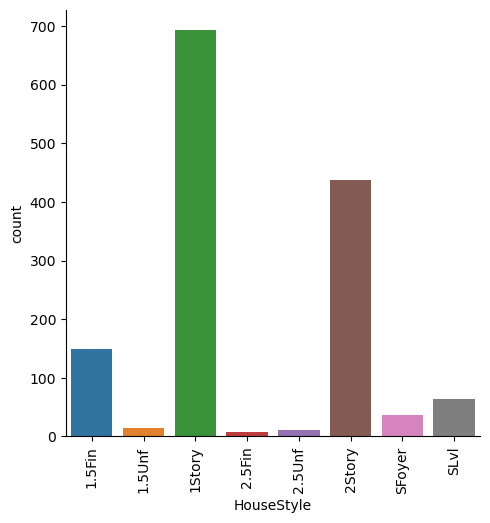

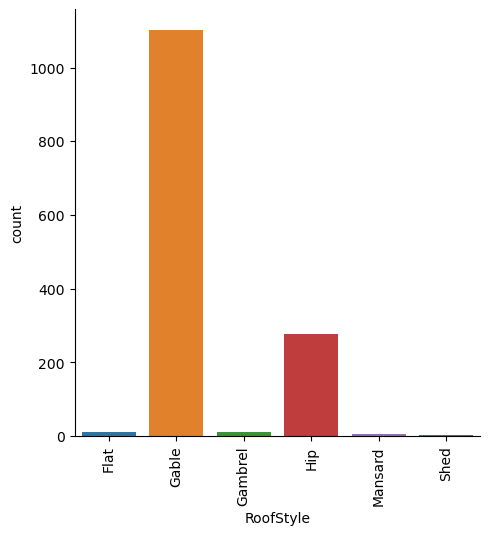

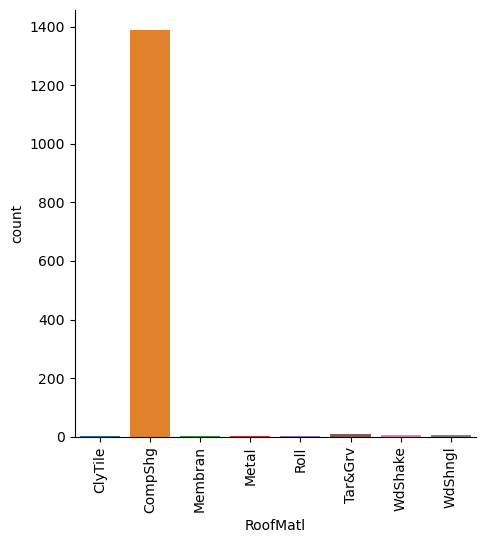

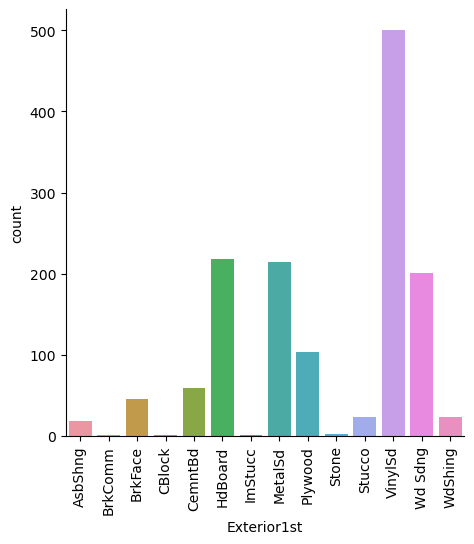

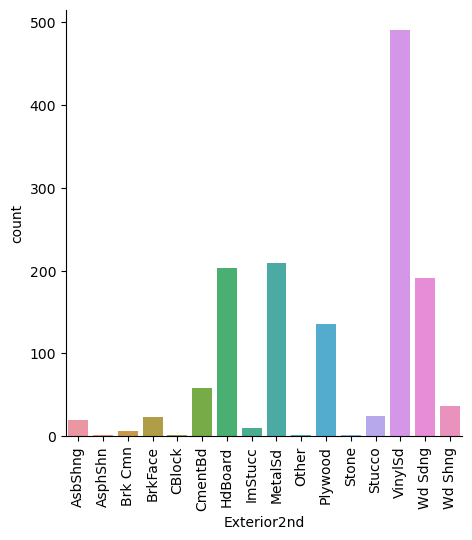

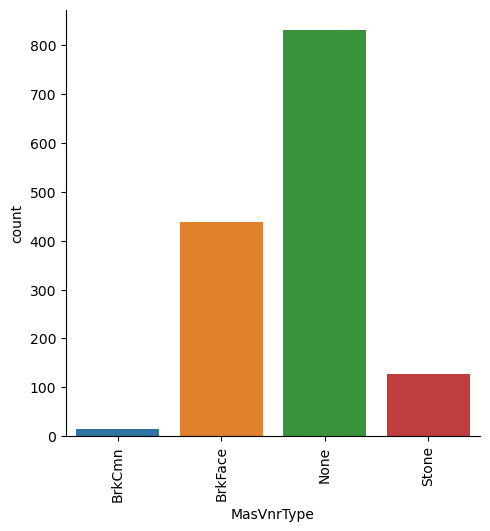

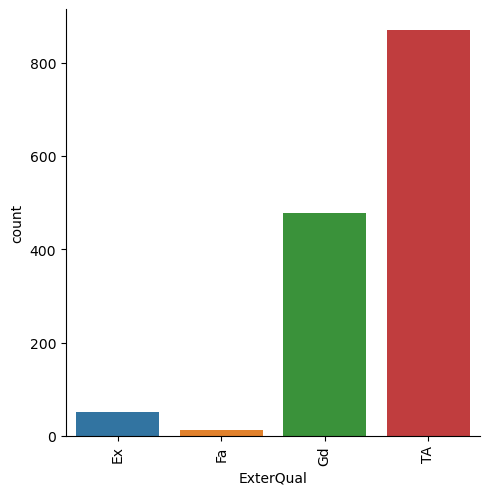

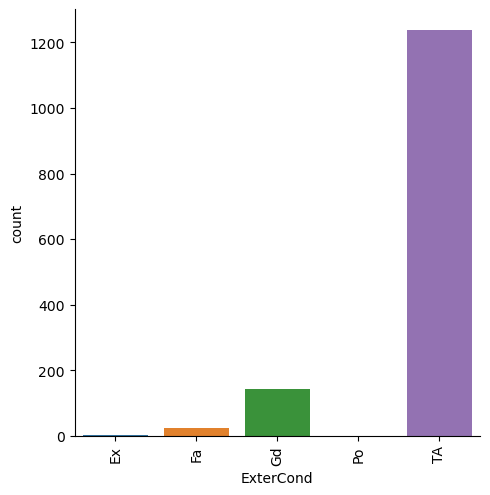

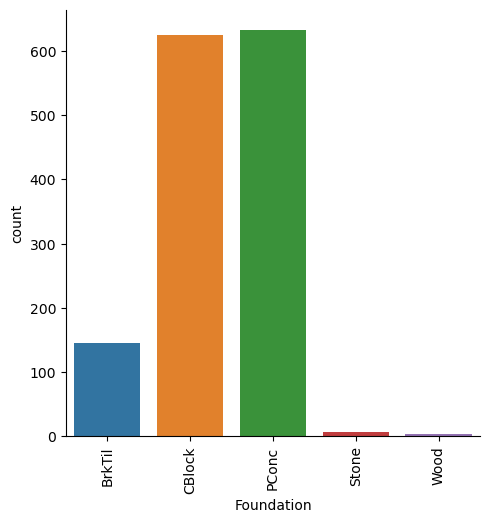

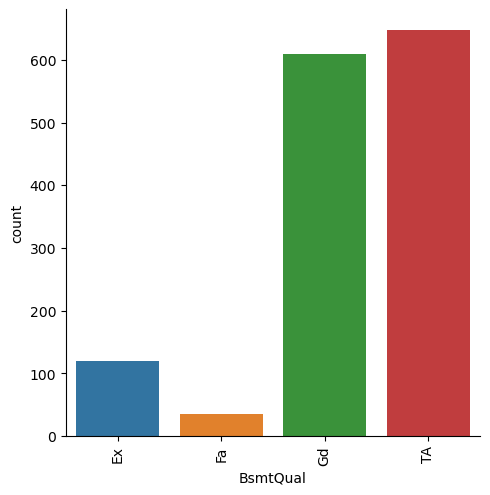

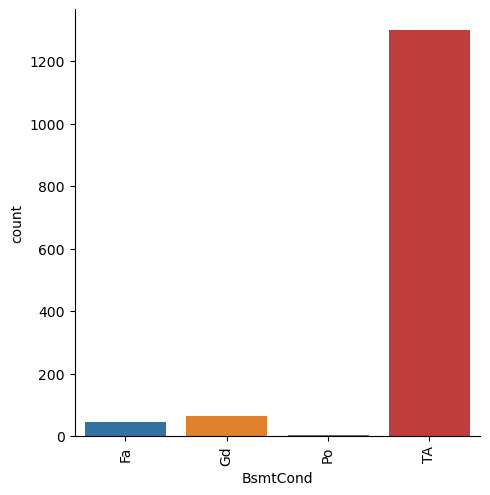

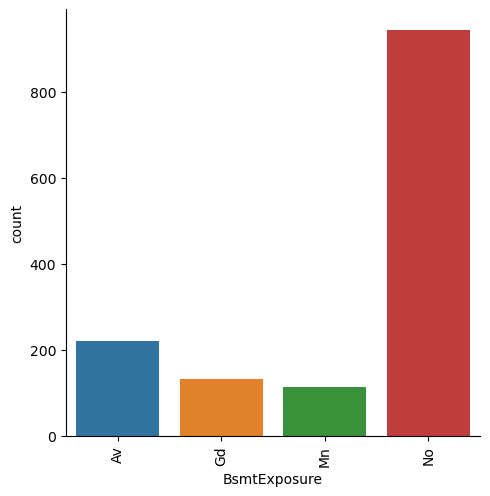

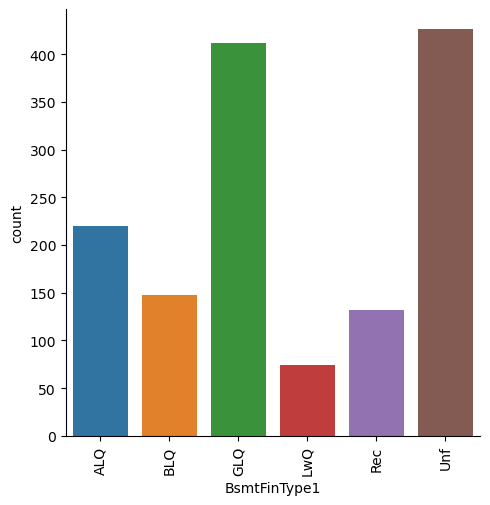

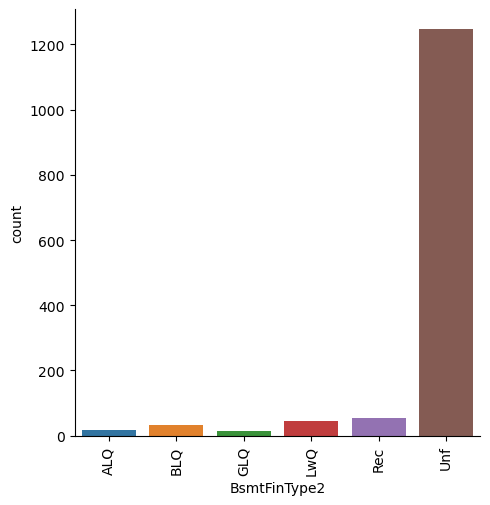

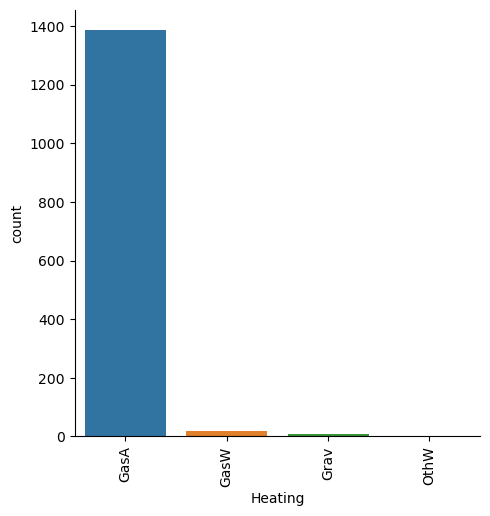

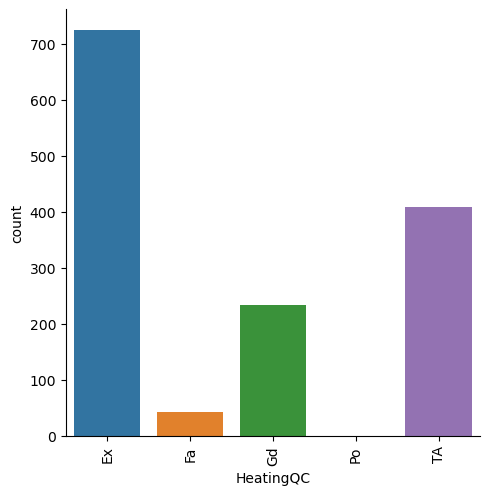

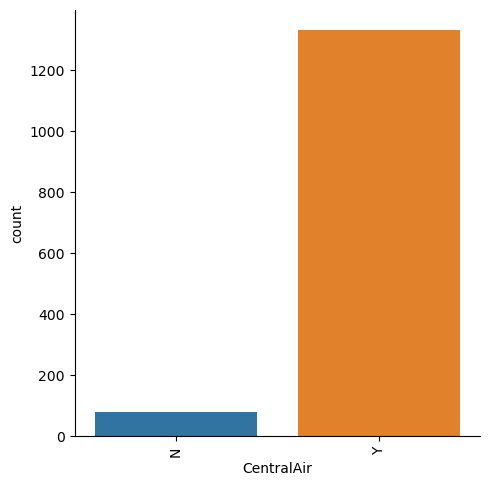

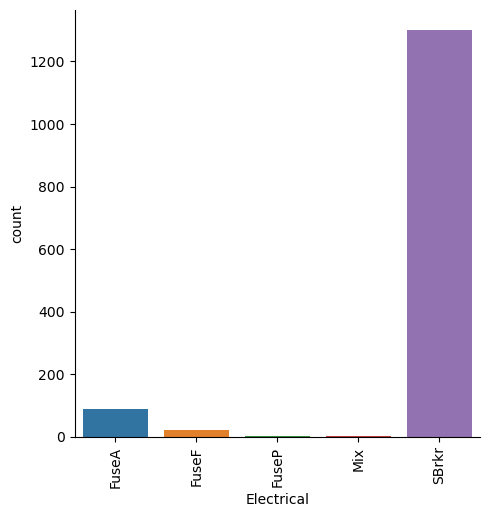

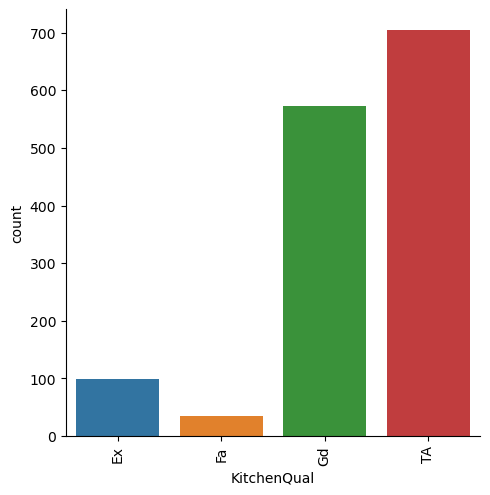

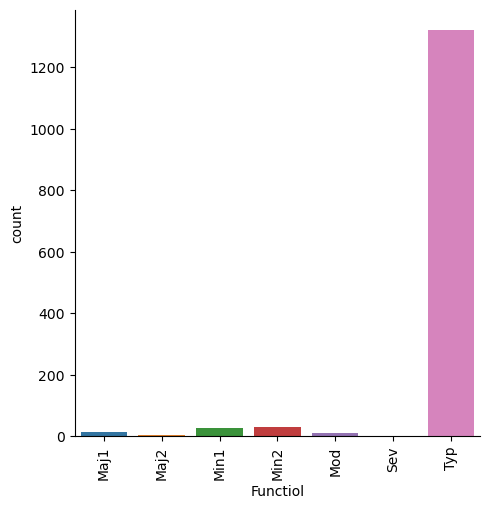

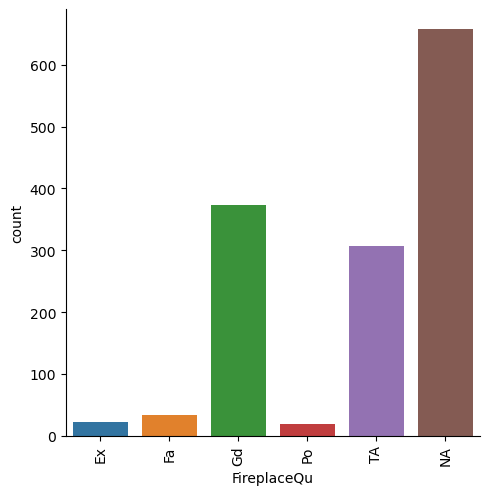

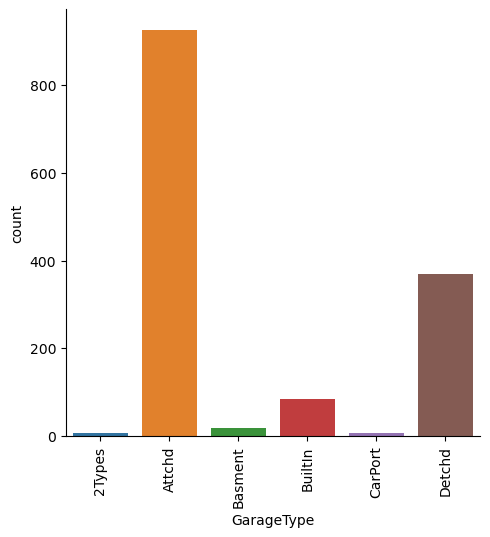

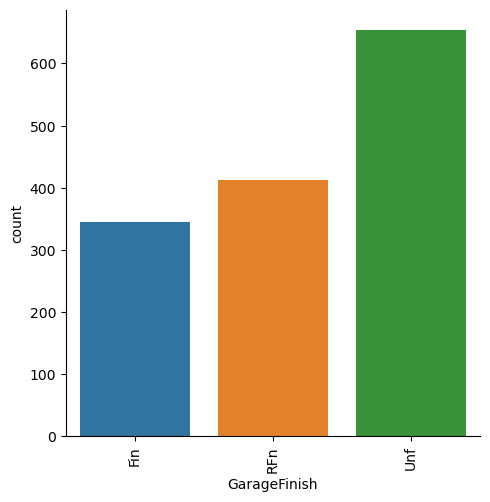

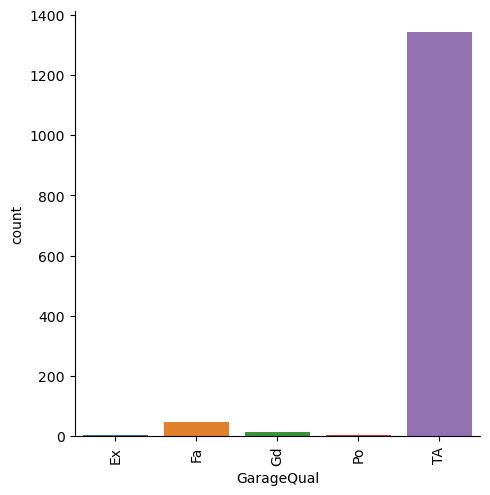

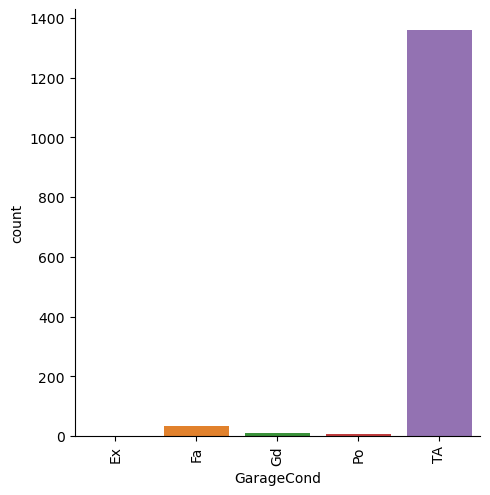

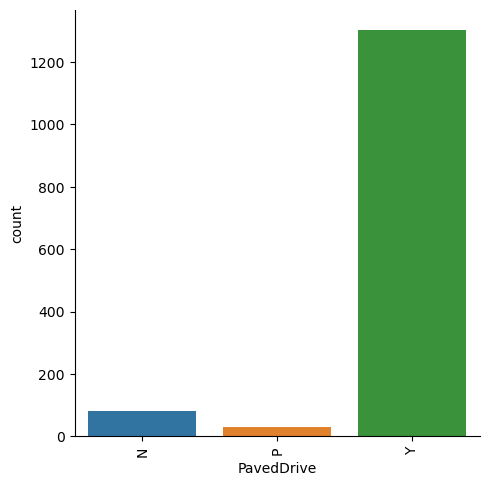

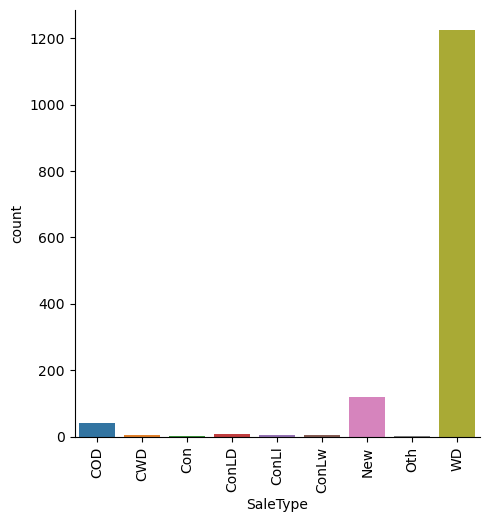

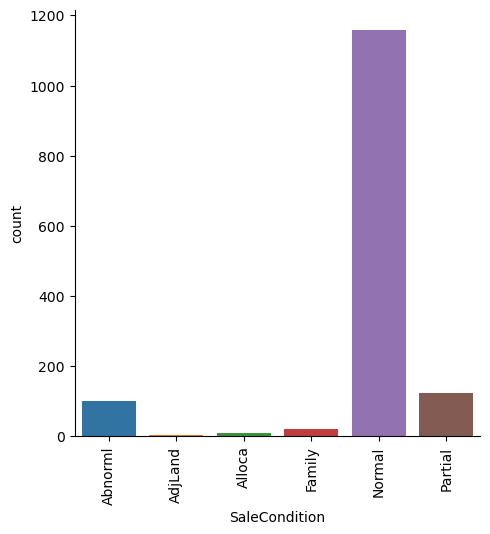

In [30]:
# Ahora hay que buscar inconsistencias.
for columna in df_limpio.select_dtypes("category").columns:
    sns.catplot(data=df_limpio, x=columna, kind="count")
    plt.xticks(rotation=90)
    plt.show()
    #print(df_limpio[columna].value_counts())
    
# Hay muchas inconsistencias que se podrían tratar por medio de una recategorización.

Antes, quiero ver cómo están las correlaciones, para ello convertiré todo el dataset a numérico.

In [31]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [32]:
df_categoricos = df_limpio.select_dtypes("category")
df_numericos = df_limpio.select_dtypes("number")
df_catnumbers = MultiColumnLabelEncoder(columns=df_categoricos.columns).fit_transform(df_categoricos)

In [33]:
print(df_catnumbers.info())
print(df_numericos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1412 non-null   int32
 1   Street         1412 non-null   int32
 2   LotShape       1412 non-null   int32
 3   LandContour    1412 non-null   int32
 4   Utilities      1412 non-null   int32
 5   LotConfig      1412 non-null   int32
 6   LandSlope      1412 non-null   int32
 7   Neighborhood   1412 non-null   int32
 8   Condition1     1412 non-null   int32
 9   Condition2     1412 non-null   int32
 10  BldgType       1412 non-null   int32
 11  HouseStyle     1412 non-null   int32
 12  RoofStyle      1412 non-null   int32
 13  RoofMatl       1412 non-null   int32
 14  Exterior1st    1412 non-null   int32
 15  Exterior2nd    1412 non-null   int32
 16  MasVnrType     1412 non-null   int32
 17  ExterQual      1412 non-null   int32
 18  ExterCond      1412 non-null   int32
 19  Founda

In [34]:
df_consolidado = pd.concat([df_catnumbers, df_numericos], axis=1)
print(df_consolidado.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1412 non-null   int32  
 1   Street         1412 non-null   int32  
 2   LotShape       1412 non-null   int32  
 3   LandContour    1412 non-null   int32  
 4   Utilities      1412 non-null   int32  
 5   LotConfig      1412 non-null   int32  
 6   LandSlope      1412 non-null   int32  
 7   Neighborhood   1412 non-null   int32  
 8   Condition1     1412 non-null   int32  
 9   Condition2     1412 non-null   int32  
 10  BldgType       1412 non-null   int32  
 11  HouseStyle     1412 non-null   int32  
 12  RoofStyle      1412 non-null   int32  
 13  RoofMatl       1412 non-null   int32  
 14  Exterior1st    1412 non-null   int32  
 15  Exterior2nd    1412 non-null   int32  
 16  MasVnrType     1412 non-null   int32  
 17  ExterQual      1412 non-null   int32  
 18  ExterCon

In [35]:
mejoresColumnas = df_consolidado.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False).head(20)
print(df_consolidado.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False).head(20))

SalePrice       1.000000
OverallQual     0.786765
GrLivArea       0.711080
GarageCars      0.641825
GarageArea      0.621095
1stFlrSF        0.614753
TotalBsmtSF     0.611084
FullBath        0.575604
TotRmsAbvGrd    0.545540
YearBuilt       0.518736
YearRemodAdd    0.500266
MasVnrArea      0.474525
Fireplaces      0.462937
Foundation      0.455333
GarageYrBlt     0.399368
BsmtFinSF1      0.368849
LotFrontage     0.327927
2ndFlrSF        0.317948
WoodDeckSF      0.317361
OpenPorchSF     0.304972
Name: SalePrice, dtype: float64


## Modelo de Machine Learning

In [36]:
X = df_consolidado.drop(columns="SalePrice")
#X = df_consolidado[mejoresColumnas.drop("SalePrice").index]
y = df_consolidado["SalePrice"]

print(int(len(X) * 0.9))
X_al90 = X[:int(len(X) * 0.9)]
y_al90 = y[:int(len(y) * 0.9)]


X_pruebas10 = X[int(len(X) * 0.9):]
y_pruebas10 = y[int(len(y) * 0.9):]

print(X_al90.shape)

1270
(1270, 76)


In [161]:
pipeline = Pipeline(steps = [("escalado", StandardScaler()), ("rfr", RandomForestRegressor(random_state=2033, n_jobs=-1))])

gridSearch = {
    "rfr__n_estimators": [100, 200, 300, 400, 500],
    "rfr__max_features": ["sqrt", "log2"],
    "rfr__max_depth": [4, 5, 6, 7, 8],
    "rfr__criterion": ["squared_error", "poisson", "friedman_mse", "absolute_error"],
    "rfr__random_state": [2033]
}

grid_pipe_randomForest = GridSearchCV(pipeline, param_grid=gridSearch, cv=5, verbose=1)
grid_pipe_randomForest.fit(X_al90, y_al90)
print(grid_pipe_randomForest.best_params_)
print(grid_pipe_randomForest.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'rfr__criterion': 'poisson', 'rfr__max_depth': 8, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 500, 'rfr__random_state': 2033}
0.8444699786361994


In [162]:
print(grid_pipe_randomForest.score(X_pruebas10, y_pruebas10))

0.8657787530629784


In [ ]:
"""
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2033)
fold_num = 1
puntajes = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    grid_pipeline = GridSearchCV(pipeline, param_grids=gridSearch, cv=None, verbose=1)
    
    grid_pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    puntaje = accuracy_score(y_test, y_pred)
    print(f"Puntaje por fold {fold_num}: ", puntaje)
    fold_num += 1
"""

In [108]:
# Ahora con xgboost
from xgboost import XGBRegressor

pipeline = Pipeline(steps = [("escalado", StandardScaler()), ("xgbr", XGBRegressor(random_state=2033, n_jobs=-1))])

gridSearch = {
    "xgbr__booster": ["gbtree"],
    "xgbr__device": ["cuda"],
    "xgbr__objective": ["reg:squarederror"],
    "xgbr__learning_rate": [0.03, 0.05, 0.07],
    "xgbr__max_depth": [5, 6, 7, 8],
    "xgbr__min_child_weight": [4],
    "xgbr__subsample": [0.7],
    "xgbr__colsample_bytree": [0.7],
    "xgbr__n_estimators": [100, 250, 500]
}

grid_pipe_XGBoost = GridSearchCV(pipeline, param_grid=gridSearch, cv=5, verbose=1)
grid_pipe_XGBoost.fit(X_al90, y_al90)
print(grid_pipe_XGBoost.best_params_)
print(grid_pipe_XGBoost.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'xgbr__booster': 'gbtree', 'xgbr__colsample_bytree': 0.7, 'xgbr__device': 'cuda', 'xgbr__learning_rate': 0.05, 'xgbr__max_depth': 5, 'xgbr__min_child_weight': 4, 'xgbr__n_estimators': 500, 'xgbr__objective': 'reg:squarederror', 'xgbr__subsample': 0.7}
0.879597262785806


In [109]:
print(grid_pipe_XGBoost.score(X_pruebas10, y_pruebas10))

0.8743208964451827


In [110]:
# Ahora con PCA
from sklearn.decomposition import PCA


pipeline = Pipeline(steps = [("escalado", StandardScaler()), ("pcaReduction", PCA()), ("xgbr", XGBRegressor(random_state=2033, n_jobs=-1))])

gridSearch = {
    "xgbr__booster": ["gbtree"],
    "xgbr__device": ["cuda"],
    "xgbr__objective": ["reg:squarederror"],
    "xgbr__learning_rate": [0.03, 0.05, 0.07],
    "xgbr__max_depth": [5, 6, 7, 8],
    "xgbr__min_child_weight": [4],
    "xgbr__subsample": [0.7],
    "xgbr__colsample_bytree": [0.7],
    "xgbr__n_estimators": [100, 250, 500]
}

grid_pipe_PCA = GridSearchCV(pipeline, param_grid=gridSearch, cv=5, verbose=1)
grid_pipe_PCA.fit(X_al90, y_al90)
print(grid_pipe_PCA.best_params_)
print(grid_pipe_PCA.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'xgbr__booster': 'gbtree', 'xgbr__colsample_bytree': 0.7, 'xgbr__device': 'cuda', 'xgbr__learning_rate': 0.03, 'xgbr__max_depth': 5, 'xgbr__min_child_weight': 4, 'xgbr__n_estimators': 500, 'xgbr__objective': 'reg:squarederror', 'xgbr__subsample': 0.7}
0.8415016173865524


In [113]:
print(grid_pipe_PCA.score(X_pruebas10, y_pruebas10))

0.8961474375366408


In [ ]:
# Ahora con redes neuronales
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline(steps = [("escalado", StandardScaler()), ("ann", MLPRegressor(random_state=2033))])

gridSearch = {
    #"ann__hidden_layer_sizes": [100, 200, 300, 400, 500],
    "ann__hidden_layer_sizes": [100, 300, 500],
    "ann__activation": ["relu", "tanh", "logistic"],
    #"ann__solver": ["adam", "sgd", "lbfgs"],
    "ann__solver": ["adam"],
    "ann__learning_rate_init": [0.0001, 0.001, 0.005, 0.01],
    "ann__max_iter": [1000, 2000, 4000, 6000],
    "ann__random_state": [2033]
}

grid_pipe_ANN = GridSearchCV(pipeline, param_grid=gridSearch, cv=5, verbose=1)
grid_pipe_ANN.fit(X_al90, y_al90)
print(grid_pipe_ANN.best_params_)
print(grid_pipe_ANN.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_m

In [ ]:
print(grid_pipe_ANN.score(X_pruebas10, y_pruebas10))

In [ ]:
# Pruebas en real
df_pruebas_real = pd.read_csv("housing_test.csv")
df_pruebas_real_cat = MultiColumnLabelEncoder(columns=df_pruebas_real.select_dtypes("object")).fit_transform(df_pruebas_real)

In [ ]:
df_pruebas_real_cat.fillna(method="ffill", inplace=True)
#print(df_pruebas_real_cat.isna().sum()>0)

In [ ]:
X_pruebasReal = df_pruebas_real_cat[listaColumnasX]
y_subirPredicciones = grid_pipe_ANN.predict(X_pruebasReal)

In [ ]:
dfFinal = pd.concat([X_pruebasReal[["Id"]], pd.DataFrame(y_subirPredicciones, columns=["SalePrice"])], axis=1)

In [ ]:
print(dfFinal)

In [170]:
dfFinal.to_csv("Resultados.csv", index=False)